In [2]:
%%markdown
## 5.1.10 Plot Pandas DataFrame and Series

## 5.1.10 Plot Pandas DataFrame and Series


In [3]:
# Set up
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Load CSV
pyber_ride_df=pd.read_csv('Resources/PyBer_ride_data.csv')
pyber_ride_df

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34
5,June,27.04
6,July,43.82
7,Aug,10.56
8,Sept,11.85
9,Oct,27.90


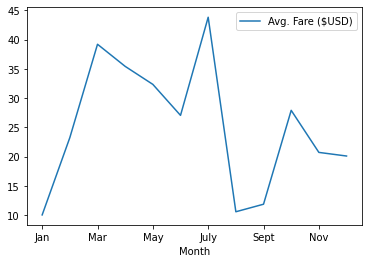

In [4]:
pyber_ride_df.plot(x='Month',y='Avg. Fare ($USD)')
plt.show()

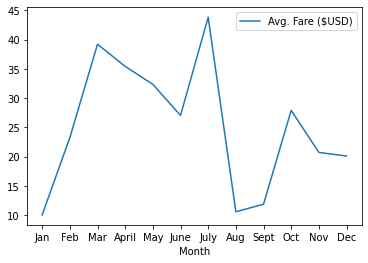

In [5]:
# Set x-axis and tick locations
x_axis=np.arange(len(pyber_ride_df))
tick_locations=[value for value in x_axis]
# Plot the data
pyber_ride_df.plot(x='Month',y='Avg. Fare ($USD)')
plt.xticks(tick_locations,pyber_ride_df['Month'])
plt.show()


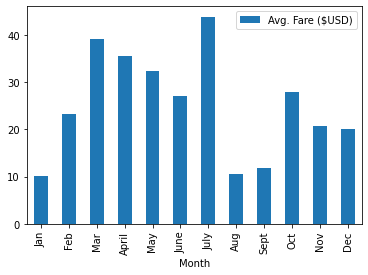

In [6]:
pyber_ride_df.plot.bar(x="Month", y="Avg. Fare ($USD)")
plt.show()

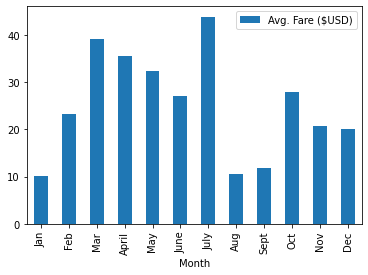

In [7]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)", kind='bar')
plt.show()

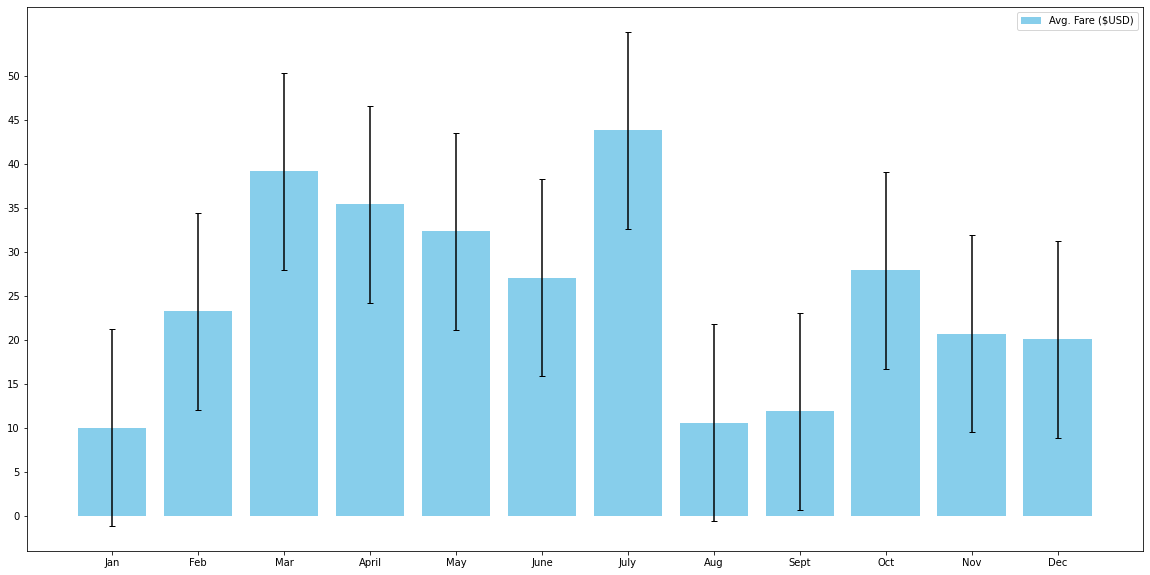

In [8]:
# Skill Drill
# 1.Add error bars.
# 2.Add caps to the error bars.
# 3.Change the color of the bars to sky blue.
# 4.Rotate the labels on the x-axis to horizontal.
# 5.Set the y-axis increment to every $5.
import statistics
x_series=pd.Series(pyber_ride_df["Month"])
y_series=pd.Series(pyber_ride_df["Avg. Fare ($USD)"])
st_dev=statistics.stdev(y_series)
plt.subplots(figsize=(20,10))
plt.yticks(np.arange(0, 51, step=5))
plt.bar(x_series,y_series, yerr=st_dev,capsize=3,color='skyblue',label="Avg. Fare ($USD)")
plt.legend()
plt.show()


In [9]:
%%markdown
# 5.2.3 Load and Read the CSV files

# 5.2.3 Load and Read the CSV files


In [10]:
# Files to load 
city_data_to_load='Resources/city_data.csv'
ride_data_to_load='Resources/ride_data.csv'


In [11]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [12]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [13]:
%%markdown
## Inspect the city data DataFrame

## Inspect the city data DataFrame


In [14]:
%%markdown
### 1.Get all the rows that contain null values.
### 2.Make sure the driver_count column has an integer data type.
### 3.Find out how many data points there are for each type of city.

### 1.Get all the rows that contain null values.
### 2.Make sure the driver_count column has an integer data type.
### 3.Find out how many data points there are for each type of city.


In [15]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [16]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [17]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [18]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [19]:
# Get the number of data points from the Urban,Suburban and Rural cities.
sum_urban=sum(city_data_df["type"]=="Urban")
sum_suburban=sum(city_data_df["type"]=="Suburban")
sum_rural=sum(city_data_df["type"]=="Rural")

print(f'{sum_urban} urban, {sum_suburban} suburban, {sum_rural} rural')

66 urban, 36 suburban, 18 rural


In [20]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [21]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [22]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [23]:
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df,city_data_df,how='left',on=['city','city'])

#Display the dataframe
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [24]:
%%markdown
## 5.3.1 Create DataFrames for each type of city

## 5.3.1 Create DataFrames for each type of city


In [33]:
#Create the Urban,Suburban and Rural cities Data Frames
urban_cities_df=pyber_data_df[pyber_data_df['type']=='Urban']
suburban_cities_df=pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df=pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [44]:
%%markdown
# 5.3.2 Get the Number of Rides for Each City Type

# 5.3.2 Get the Number of Rides for Each City Type


In [79]:
#Get the number of rides per type and city
urban_ride_count=urban_cities_df.groupby(urban_cities_df['city']).count()['ride_id']

suburban_ride_count=suburban_cities_df.groupby(suburban_cities_df['city']).count()['ride_id']

rural_ride_count=rural_cities_df.groupby(rural_cities_df['city']).count()['ride_id']


In [80]:
%%markdown
# 5.3.3 Get the Average Fare for Each City Type

# 5.3.3 Get the Average Fare for Each City Type


In [81]:
#Get the average fare per type and city
urban_avg_fare=urban_cities_df.groupby(urban_cities_df['city']).mean()['fare']

suburban_avg_fare=suburban_cities_df.groupby(suburban_cities_df['city']).mean()['fare']

rural_avg_fare=rural_cities_df.groupby(rural_cities_df['city']).mean()['fare']


In [53]:
%%markdown
# 5.3.4 Get the Average Number of Drivers for each city type

# 5.3.4 Get the Average Number of Drivers for each city type


In [82]:
#Get the average number of drivers per type and city
urban_driver_count=urban_cities_df.groupby(urban_cities_df['city']).mean()['driver_count']

suburban_driver_count=suburban_cities_df.groupby(suburban_cities_df['city']).mean()['driver_count']

rural_driver_count=rural_cities_df.groupby(rural_cities_df['city']).mean()['driver_count']


In [59]:
%%markdown
# 5.3.5 Create Bubble Chart - 5.3.6 Create Bubble Chart for all cities

# 5.3.5 Create Bubble Chart


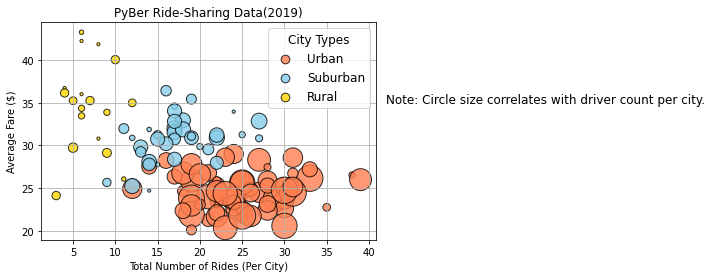

In [94]:
# Uban Chart
plt.scatter(urban_ride_count,urban_avg_fare,s=urban_driver_count*10,c='coral',alpha=0.8,edgecolor="black",linewidths=1,label='Urban')

# Suburban Chart
plt.scatter(suburban_ride_count,suburban_avg_fare,s=suburban_driver_count*10, c="skyblue",edgecolor="black", linewidths=1,alpha=0.8, label="Suburban")

# Scatter Chart
plt.scatter(rural_ride_count,rural_avg_fare,s=rural_driver_count*10, c="gold",edgecolor="black", linewidths=1,alpha=0.8, label="Rural")

# Chart Format
plt.title('PyBer Ride-Sharing Data(2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

#Create a lengend

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")

# Show Graph
plt.show()

In [88]:
%%markdown
- What happended on the code for the legend above
1. We made the font size for the text "small" with fontsize=.
2. Then we expanded the legend horizontally using mode= to fit the area. Because the font size is small, this is optional.
3. We added the number of scatter points in the legend for each marker to be 1. We can add multiple marker points by increasing the number.
4. The location setting, loc=, for the legend is where it will fit the "best" based on the plotting of the data points.
5. We added a legend title.
6. We set each marker in the legend equal to 75-point font by using the legendHandles[]._sizes attribute and list indexing in the brackets to reference one of the three scatter plots. 
7. Finally, we increased the font size of the legend title to 12.

- What happended on the code for the legend above
1. We made the font size for the text "small" with fontsize=.
2. Then we expanded the legend horizontally using mode= to fit the area. Because the font size is small, this is optional.
3. We added the number of scatter points in the legend for each marker to be 1. We can add multiple marker points by increasing the number.
4. The location setting, loc=, for the legend is where it will fit the "best" based on the plotting of the data points.
5. We added a legend title.
6. We set each marker in the legend equal to 75-point font by using the legendHandles[]._sizes attribute and list indexing in the brackets to reference one of the three scatter plots. 
7. Finally, we increased the font size of the legend title to 12.


In [95]:
%%markdown
# 5.4.1 Summary Statistics for Number of Rides by City Type

# 5.4.1 Summary Statistics for Number of Rides by City Type


In [114]:
%%markdown
## Pandas describe() Function


## Pandas describe() Function


In [107]:
print(f'\n Urban cities:\n{urban_cities_df.describe()}\n')
print(f'\n Suburban cities\n {suburban_cities_df.describe()}\n')
print(f'\n Rural cities \n {rural_cities_df.describe()}\n')



 Urban cities:
              fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000


 Suburban cities
              fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712000
std     10.677508  2.912410e+12      8.042372
min     12.050000  3.218337e+08      1.000000
25%     21.970000  2.364253e+12      5.000000
50%     30.750000  5.053221e+12     16.000000
75%     39.830000  7.551674e+12     21.000000
max     49.960000  9.917744e+12     25.000000


 Rural cities 
              fare       ride_id  driver_count
count  125.000000  1.250000e+02    125.000000
mean    34.623440

In [109]:
# Get summary statistics for ride count.

print(f'\n Urban cities:\n{urban_ride_count.describe()}\n')
print(f'\n Suburban cities\n {suburban_ride_count.describe()}\n')
print(f'\n Rural cities \n {rural_ride_count.describe()}\n')



 Urban cities:
count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64


 Suburban cities
 count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64


 Rural cities 
 count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64



In [115]:
%%markdown
## Pandas mean(), median(), and mode() Methods

## Pandas mean(), median(), and mode() Methods


In [110]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [111]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [113]:
# Calculate the mode of the ride count for the each city type.
urban_ride_count.mode(),suburban_ride_count.mode(),rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [116]:
%%markdown
## NumPy mean() and median() Functions and SciPy mode() Function

## NumPy mean() and median() Functions and SciPy mode() Function


In [117]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [118]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [119]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [120]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [121]:
%%markdown
# 5.4.2 Summary Statistics for the Fare by City Type

# 5.4.2 Summary Statistics for the Fare by City Type


In [125]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()


0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [126]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [128]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()


1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [129]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [130]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()


2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [131]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [132]:
%%markdown
# 5.4.3 Summary Statistics for the Number of Drivers by City Type

# 5.4.3 Summary Statistics for the Number of Drivers by City Type


In [140]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [146]:
# Calculate the measures of central tendency for the driver count for urban cities.
mean_driver_count_urban = np.mean(urban_drivers)
print(f"The mean number of drivers for urban cities is: {mean_driver_count_urban:.0f}.")

median_driver_count_urban = np.median(urban_drivers)
print(f"The median number of drivers for urban cities is:{median_driver_count_urban:.0f}.")

mode_driver_count_urban = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban cities is:{mode_driver_count_urban}.")

The mean number of drivers for urban cities is: 37.
The median number of drivers for urban cities is:37.
The mode number of drivers for urban cities is:ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [147]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [148]:
# Calculate the measures of central tendency for the driver count for suburban cities.
mean_driver_count_suburban = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban cities is:{mean_driver_count_suburban:.0f}.")

median_driver_count_suburban = np.median(suburban_drivers)
print(f"The median number of drivers for suburban cities is:{median_driver_count_suburban:.0f}.")

mode_driver_count_suburban = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban cities is:{mode_driver_count_suburban}.")

The mean number of drivers for suburban cities is:14.
The median number of drivers for suburban cities is:16.
The mode number of drivers for suburban cities is:ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [149]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [150]:
# Calculate the measures of central tendency for the driver count for rural cities.
mean_driver_count_rural = np.mean(rural_drivers)
print(f"The mean number of drivers for rural cities is:{mean_driver_count_rural:.0f}.")

median_driver_count_rural = np.median(rural_drivers)
print(f"The median number of drivers for rural cities is:{median_driver_count_rural:.0f}.")

mode_driver_count_rural = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural cities is:{mode_driver_count_rural}.")

The mean number of drivers for rural cities is:4.
The median number of drivers for rural cities is:4.
The mode number of drivers for rural cities is:ModeResult(mode=array([1], dtype=int64), count=array([32])).


In [151]:
%%markdown
# 5.4.4 Create Box-and-Whisker Plots

# 5.4.4 Create Box-and-Whisker Plots


In [152]:
%%markdown
## Box-and-Whisker Plots for Ride Count Data

## Box-and-Whisker Plots for Ride Count Data


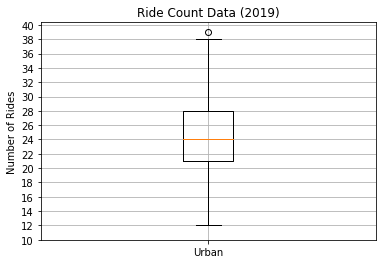

['Urban']

In [153]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


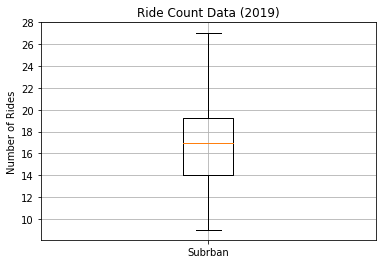

In [158]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 29, step=2.0))
ax.grid()
plt.show()


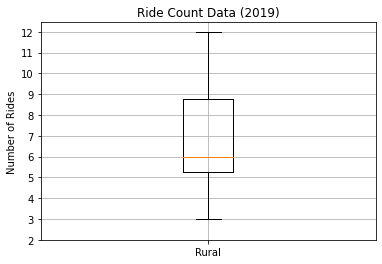

In [163]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2, 13, step=1.0))
ax.grid()
plt.show()


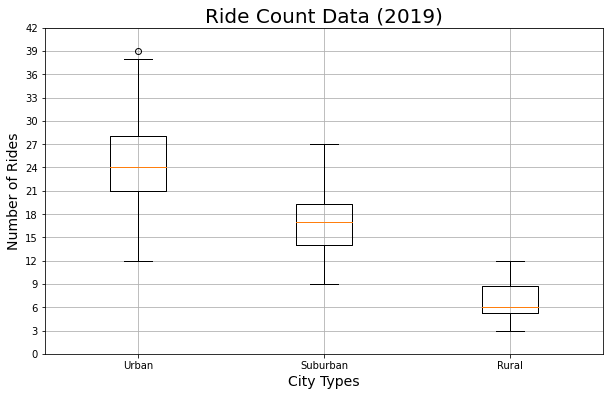

In [164]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [165]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [166]:
%%markdown
## Box-and-Whisker Plots for Ride Fare Data

## Box-and-Whisker Plots for Ride Fare Data


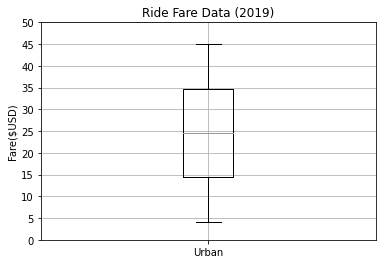

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [167]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

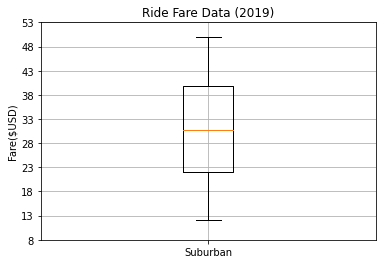

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [170]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(8, 55, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

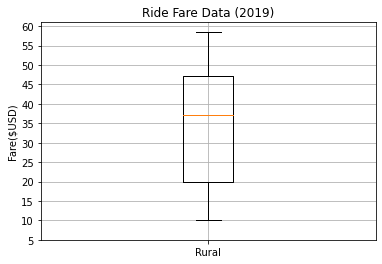

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [172]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(5, 65, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

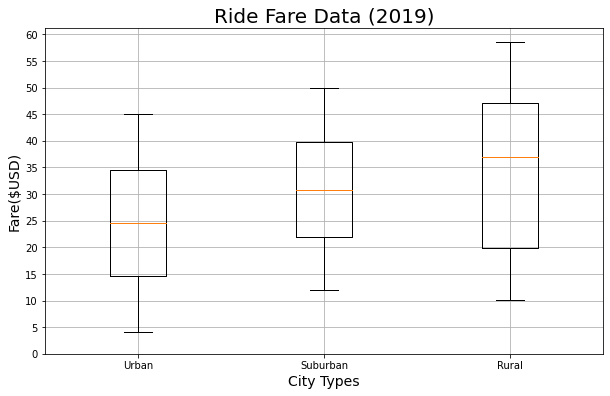

In [173]:
# Add all fare data box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

In [174]:
%%markdown
## Box-and-Whisker Plots for Driver Count Data

## Box-and-Whisker Plots for Driver Count Data


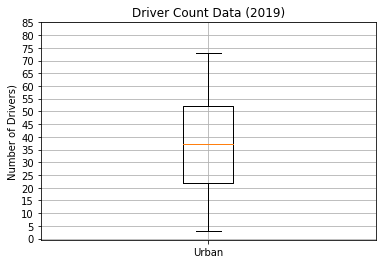

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [175]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

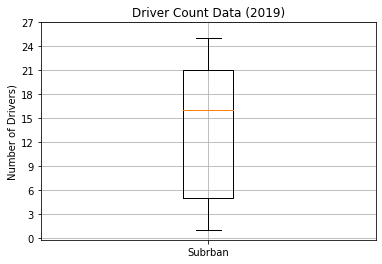

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [180]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 28, step=3.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

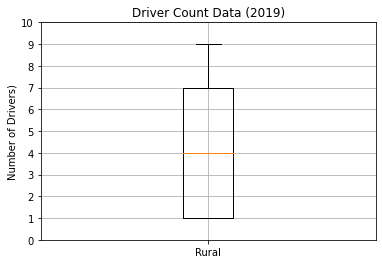

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [184]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 11, step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

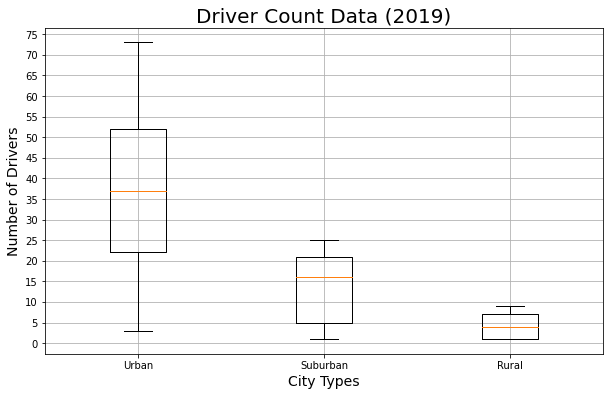

In [185]:
# Add all fare data box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [186]:
%%markdown
# 5.5.1 Get the Percentage of Fares for Each City Type

# 5.5.1 Get the Percentage of Fares for Each City Type


In [219]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [220]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares


63538.64

In [221]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

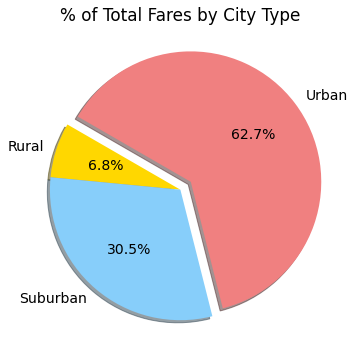

In [222]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()